# 04. Entrenamiento de la CNN

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
import matplotlib.pyplot as plt

In [2]:

DATA_DIR = '../data/processed/train_ocr'
MODEL_PATH = '../models/ocr_cnn.h5'
IMG_SIZE = (32, 32)
BATCH_SIZE = 32
EPOCHS = 20
NUM_CLASSES = 36

In [3]:

if os.path.exists(DATA_DIR):
    train_ds = tf.keras.utils.image_dataset_from_directory(
        DATA_DIR,
        validation_split=0.2,
        subset="training",
        seed=123,
        image_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        color_mode='grayscale',
        label_mode='categorical'
    )
    
    val_ds = tf.keras.utils.image_dataset_from_directory(
        DATA_DIR,
        validation_split=0.2,
        subset="validation",
        seed=123,
        image_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        color_mode='grayscale',
        label_mode='categorical'
    )
    
    class_names = train_ds.class_names
    
    normalization_layer = tf.keras.layers.Rescaling(1./255)
    train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
    val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
    
    print(f'Classes: {class_names}')
else:
    print('Data directory not found. Run Notebook 02 first.')

Found 35500 files belonging to 35 classes.
Using 28400 files for training.
Found 35500 files belonging to 35 classes.
Using 7100 files for validation.
Classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [4]:

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names) if 'class_names' in locals() else NUM_CLASSES, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\Paco\miniconda3\envs\anpr-gpu\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 35)             │         4,515 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 318,371 (1.21 MB)

 Trainable params: 318,371 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:

if 'train_ds' in locals():
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS
    )
    

    model.save(MODEL_PATH)
    print(f'Model saved to {MODEL_PATH}')

Epoch 1/20
888/888 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - accuracy: 0.6900 - loss: 1.0552 - val_accuracy: 0.9618 - val_loss: 0.1458
Epoch 2/20
888/888 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.9054 - loss: 0.2958 - val_accuracy: 0.9827 - val_loss: 0.0680
Epoch 3/20
888/888 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9386 - loss: 0.1883 - val_accuracy: 0.9879 - val_loss: 0.0383
Epoch 4/20
888/888 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.9491 - loss: 0.1544 - val_accuracy: 0.9901 - val_loss: 0.0374
Epoch 5/20
888/888 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9566 - loss: 0.1283 - val_accuracy: 0.9931 - val_loss: 0.0276
Epoch 6/20
888/888 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.9650 - loss: 0.1065 - val_accuracy: 0.9955 - val_loss: 0.0204
Epoch 7/20
888/888 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.9692 - loss: 0.0896 - val_accuracy: 0.9976 - val_loss: 0.0125
Epoch 8/20
888/888 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9714 - loss: 0.0844 - 

Model saved to ../models/ocr_cnn.h5


Gráfica guardada en reports/images/


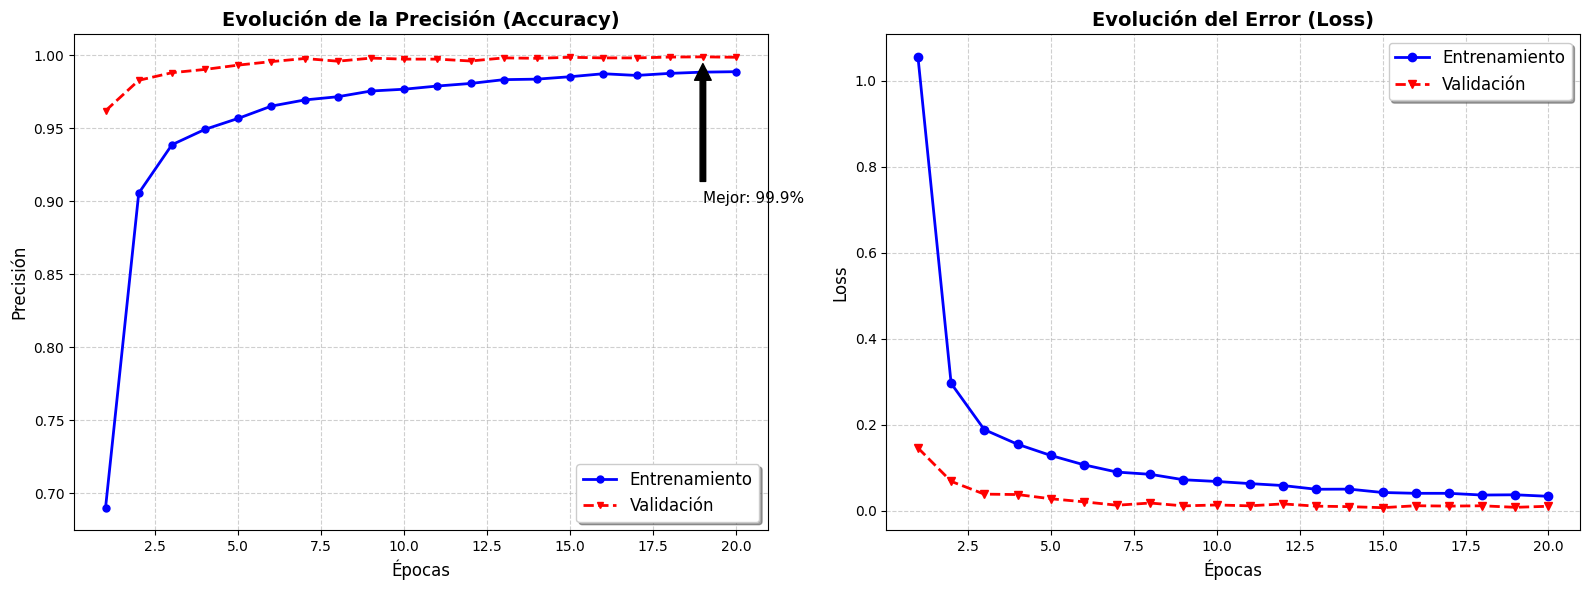

In [6]:
import matplotlib.pyplot as plt
import os

if 'history' in locals():
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    plt.figure(figsize=(16, 6)) 
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Entrenamiento', linewidth=2, markersize=5)
    plt.plot(epochs, val_acc, 'rv--', label='Validación', linewidth=2, markersize=5)
    plt.title('Evolución de la Precisión (Accuracy)', fontsize=14, fontweight='bold')
    plt.xlabel('Épocas', fontsize=12)
    plt.ylabel('Precisión', fontsize=12)
    plt.legend(loc='lower right', fontsize=12, shadow=True)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    best_val_acc = max(val_acc)
    best_epoch = val_acc.index(best_val_acc) + 1
    plt.annotate(f'Mejor: {best_val_acc:.1%}', 
                 xy=(best_epoch, best_val_acc), 
                 xytext=(best_epoch, best_val_acc - 0.1),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=11)

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Entrenamiento', linewidth=2)

    plt.plot(epochs, val_loss, 'rv--', label='Validación', linewidth=2)
    plt.title('Evolución del Error (Loss)', fontsize=14, fontweight='bold')
    plt.xlabel('Épocas', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(loc='upper right', fontsize=12, shadow=True)
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    
    os.makedirs('../reports/images', exist_ok=True)
    plt.savefig('../reports/images/training_history.png', dpi=300)
    print("Gráfica guardada en reports/images/")
    
    plt.show()
else:
    print("No se encontró el objeto 'history'. Entrena el modelo primero.")